# **Students' Social Media Addiction**

About Dataset
Overview

The Student Social Media & Relationships dataset contains anonymized records of students’ social‐media behaviors and related life outcomes. It spans multiple countries and academic levels, focusing on key dimensions such as usage intensity, platform preferences, and relationship dynamics. Each row represents one student’s survey response, offering a cross‐sectional snapshot suitable for statistical analysis and machine‐learning applications.
Scope & Coverage

- Population: Students aged 16–25 enrolled in high school, undergraduate, or graduate programs.

- Geography: Multi‐country coverage (e.g., Bangladesh, India, USA, UK, Canada, Australia, Germany, Brazil, Japan, South Korea).

- Timeframe: Data collected via a one‐time online survey administered in Q1 2025.
    
- Volume: Configurable sample sizes (e.g., 100, 500, 1,000 records) based on research needs.

**Data Collection & Methodology**

- Survey Design: Questions adapted from validated scales on social‐media addiction (e.g., Bergen Social Media Addiction Scale) and relationship conflict indices.

- Recruitment: Participants recruited through university mailing lists and social‐media platforms, ensuring diversity in academic level and country.

    **Data Quality Controls:**
    - Validation: Mandatory fields and range checks (e.g., usage hours between 0–24).

    - De‐duplication: Removal of duplicate entries via unique Student_ID checks.

    - Anonymization: No personally identifiable information collected.

##**Column Descriptions**

  **Student_ID**
    A unique integer identifier assigned to each survey respondent to enable de-duplication and track individual records without revealing personal information.

  **Age**
    The student’s age in completed years at the time of the survey, used to segment analysis by age group and control for developmental differences.

  **Gender**
    The student’s self-reported gender, recorded as “Male” or “Female” to allow for demographic breakdowns in usage and outcome measures.

  **Academic_Level**
    The highest level of education the respondent is currently enrolled in, with categories: “High School,” “Undergraduate,” or “Graduate,” facilitating stratified analyses by academic stage.

  **Country**
    The country of residence where the student completed the survey, enabling cross-country comparisons of social media behaviors and impacts.

  **Avg_Daily_Usage_Hours**
    The average number of hours per day the student spends on social media platforms, calculated from self-reported weekday and weekend usage estimates.

  **Most_Used_Platform**
    The social media platform on which the student spends the most time (e.g., Instagram, Facebook, TikTok), used to examine platform-specific effects.

  **Affects_Academic_Performance**
    A binary indicator (“Yes”/“No”) reflecting whether the student perceives their social media use as having a negative impact on their academic performance.

  **Sleep_Hours_Per_Night**
    The respondent’s average nightly sleep duration in hours, provided to investigate correlations between screen time and sleep quality/quantity.

  **Mental_Health_Score**
    A self-rated integer from 1 (poor) to 10 (excellent) indicating overall mental well-being, allowing assessment of potential associations with social media habits.

  **Relationship_Status**
    The student’s current romantic relationship status, categorized as “Single,” “In Relationship,” or “Complicated,” to explore social media’s impact on interpersonal dynamics.

  **Conflicts_Over_Social_Media**
    The number of arguments or disagreements the student reports having had with family, friends, or partners due to their social media use, serving as a proxy for social friction.

  **Addicted_Score**
    A composite score from 1 (low addiction) to 10 (high addiction) based on a standardized survey scale (e.g., Bergen Social Media Addiction Scale), quantifying the degree of problematic usage.


https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships




# **Packages and Libraries**

In [1]:
!pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance


import warnings
warnings.simplefilter(action='ignore', category=Warning)

# **Firts approach on dataset**

In [2]:
social_df = pd.read_csv('/content/Students Social Media Addiction.csv')

In [3]:
social_df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [5]:
social_df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [6]:
social_df.duplicated().sum()

np.int64(0)

**The data frame has not missing or duplicated values.**

# **Analysis Univariate**



## **Cross-Country Comparison**

After completing the univariate analysis of both qualitative and quantitative variables, I will now move forward by comparing patterns of social media addiction among students from India and the United States. This cross-country comparison aims to uncover potential differences or similarities in usage behavior, addiction levels, mental health outcomes, and social dynamics associated with social media across these two countries. The insights gained may help identify cultural or contextual factors that influence how students engage with social media.

In [7]:
quantitative_vars = [
    'Avg_Daily_Usage_Hours',
    'Addicted_Score',
    'Mental_Health_Score',
    'Sleep_Hours_Per_Night',
    'Conflicts_Over_Social_Media'
]

qualitative_vars = [
    'Gender',
    'Academic_Level',
    'Most_Used_Platform',
    'Affects_Academic_Performance',
    'Relationship_Status'
]


In [25]:
def analyze_univariate_by_country(df, country1, country2,
                                   quantitative_vars, qualitative_vars):
    # Filter the countries of interest
    df_filtered = df[df['Country'].isin([country1, country2])]

    print(f"\n🔍 Comparing {country1} vs {country2}")

    # ---- Quantitatives ----
    print("\n📊 Quantitative Variable Summary:")
    summary = df_filtered.groupby('Country')[quantitative_vars].describe()
    display(summary)

    # Boxplots for each quantitative variable
    for var in quantitative_vars:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df_filtered, x='Country', y=var, palette='Set2')
        plt.title(f'{var} by Country')
        plt.show()

        # Simple automatic insight
        means = df_filtered.groupby('Country')[var].mean()
        print(f"🔹 On average, students in {country1} have a {var} of {means[country1]:.2f}, "
              f"while in {country2}, the average is {means[country2]:.2f}.")

    # ---- Qualitatives ----
    print("\n🧮 Qualitative Variable Distribution (%):")
    for var in qualitative_vars:
        print(f"\n🔸 {var}:")
        freq = pd.crosstab(df_filtered[var], df_filtered['Country'], normalize='columns') * 100
        display(freq.round(2))

        top_val_country1 = freq[country1].idxmax()
        top_val_country2 = freq[country2].idxmax()
        print(f"✅ Most common in {country1}: {top_val_country1} ({freq.loc[top_val_country1, country1]:.1f}%)")
        print(f"✅ Most common in {country2}: {top_val_country2} ({freq.loc[top_val_country2, country2]:.1f}%)")



🔍 Comparing India vs USA

📊 Quantitative Variable Summary:


Avg_Daily_Usage_Hours                                              \
                        count      mean       std  min    25%  50%    75%   
Country                                                                     
India                    53.0  6.116981  1.127921  2.1  5.200  6.4  7.100   
USA                      40.0  6.890000  0.916459  5.3  6.475  6.9  7.525   

             Addicted_Score            ... Sleep_Hours_Per_Night       \
         max          count      mean  ...                   75%  max   
Country                                ...                              
India    7.5           53.0  7.509434  ...                 6.300  8.8   
USA      8.5           40.0  8.600000  ...                 5.825  6.9   

        Conflicts_Over_Social_Media                                          \
                              count      mean       std  min  25%  50%  75%   
Country                                                                       
India                          53.0  3.528302  1.084928  0.0  3.0  4.0  4.0   
USA                            40.0  3.800000  0.405096  3.0  4.0  4.0  4.0   

              
         max  
Country       
India    5.0  
USA      4.0  

[2 rows x 40 columns]

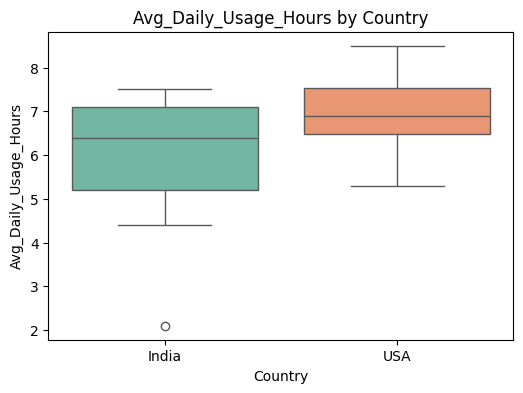

🔹 On average, students in India have a Avg_Daily_Usage_Hours of 6.12, while in USA, the average is 6.89.


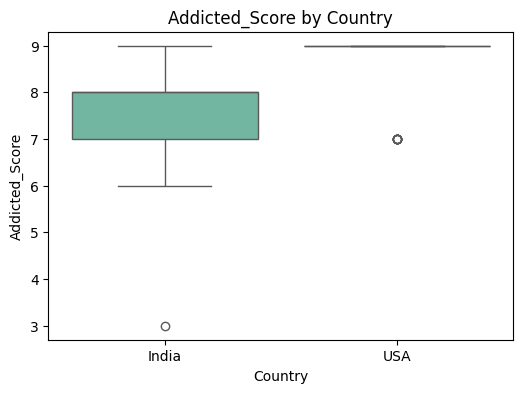

🔹 On average, students in India have a Addicted_Score of 7.51, while in USA, the average is 8.60.


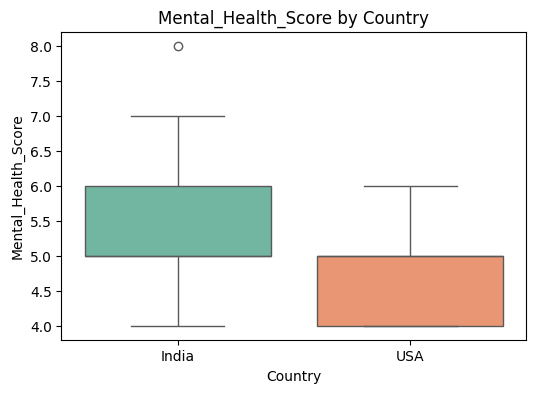

🔹 On average, students in India have a Mental_Health_Score of 5.45, while in USA, the average is 4.90.


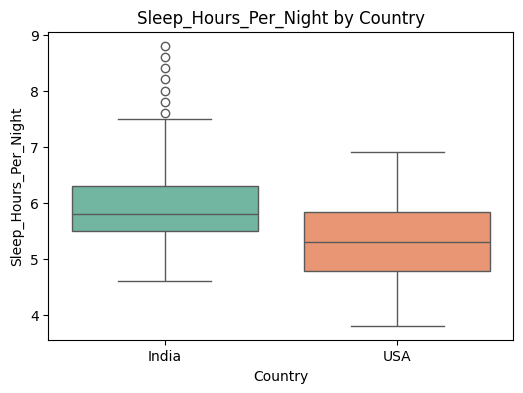

🔹 On average, students in India have a Sleep_Hours_Per_Night of 6.09, while in USA, the average is 5.38.


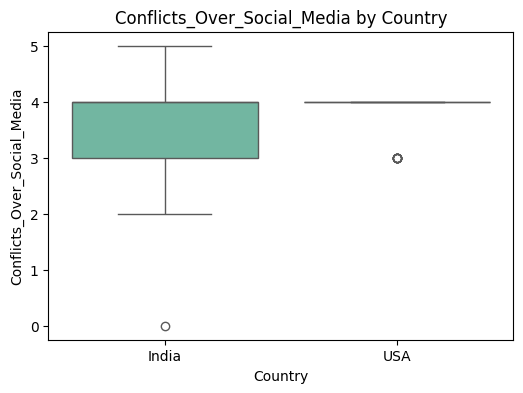

🔹 On average, students in India have a Conflicts_Over_Social_Media of 3.53, while in USA, the average is 3.80.

🧮 Qualitative Variable Distribution (%):

🔸 Gender:


Country,India,USA
Gender,,
Female,37.74,90.0
Male,62.26,10.0


✅ Most common in India: Male (62.3%)
✅ Most common in USA: Female (90.0%)

🔸 Academic_Level:


Country,India,USA
Academic_Level,,
Graduate,67.92,12.5
Undergraduate,32.08,87.5


✅ Most common in India: Graduate (67.9%)
✅ Most common in USA: Undergraduate (87.5%)

🔸 Most_Used_Platform:


Country,India,USA
Most_Used_Platform,,
Facebook,24.53,0.0
Instagram,16.98,47.5
TikTok,9.43,40.0
Twitter,1.89,12.5
WhatsApp,47.17,0.0


✅ Most common in India: WhatsApp (47.2%)
✅ Most common in USA: Instagram (47.5%)

🔸 Affects_Academic_Performance:


Country,India,USA
Affects_Academic_Performance,,
No,20.75,0.0
Yes,79.25,100.0


✅ Most common in India: Yes (79.2%)
✅ Most common in USA: Yes (100.0%)

🔸 Relationship_Status:


Country,India,USA
Relationship_Status,,
Complicated,0.00,2.5
In Relationship,81.13,80.0
Single,18.87,17.5


✅ Most common in India: In Relationship (81.1%)
✅ Most common in USA: In Relationship (80.0%)


In [9]:
analyze_univariate_by_country(
    social_df,
    country1='India',
    country2='USA',
    quantitative_vars=quantitative_vars,
    qualitative_vars=qualitative_vars
)



📊 **Quantitative Findings**

1. **Social Media Usage and Addiction**

    Students in the USA have a higher average daily usage (6.89 hours) compared to students in India (6.12 hours).

    The Addicted Score is also higher in the USA (8.60) than in India (7.51), indicating greater dependency.

2. **Mental Health and Sleep**

    Despite using social media less, Indian students reported a higher average Mental Health Score (5.45) than their American peers (4.90).

    Indian students also reported more sleep per night (6.09 hours) compared to students in the USA (5.38 hours).

3. **Conflicts Over Social Media**

    The average number of social media-related conflicts is slightly higher in the USA (3.80) than in India (3.53), although the difference is minor.

🧮 **Qualitative Findings**

1. **Gender Distribution**

    Most Indian respondents are male (62.3%), whereas in the USA, the majority are female (90%).

2. **Academic Level**

    In India, most respondents are graduate students (67.9%), while in the USA, most are undergraduates (87.5%).

3. **Most Used Platform**

    WhatsApp is the most used platform in India (47.2%), while Instagram leads in the USA (47.5%).

    TikTok has significant usage in the USA (40%) but is much lower in India (9.4%).

4. **Impact on Academic Performance**

    A high percentage of students in both countries report that social media affects their academic performance: 79.2% in India and 100% in the USA.

5. **Relationship Status**

    The majority of students in both countries are in a relationship, slightly more in India (81.1%) than in the USA (80%).

🧠 **Summary Insight**

   Although students in India use social media slightly less than those in the USA, they report better mental health and sleep patterns. This could suggest that not only the amount but also the context and content of social media usage plays a role in students' well-being.

# **Interactive Analysis of Social Media Impact on Students in India and the USA**

This interactive tool enables exploratory analysis of social media usage and its potential effects on students' well-being and academic performance in India and the USA. By selecting the type of analysis—whether between two quantitative variables, two qualitative variables, or a mix of both—users can dynamically generate visualizations and summary statistics to uncover insights. The dashboard leverages ipywidgets, pandas, and seaborn to provide a user-friendly interface for comparing variables such as screen time, addiction scores, mental health indicators, and social media platform preferences across demographics.

In [10]:
filtered_df = social_df[social_df['Country'].isin(['India', 'USA'])].copy()

In [11]:
# Filter only India and USA
filtered_df = social_df[social_df['Country'].isin(['India', 'USA'])].copy()

# Variables
quant_vars = ['Avg_Daily_Usage_Hours', 'Addicted_Score', 'Mental_Health_Score', 'Sleep_Hours_Per_Night']
qual_vars = ['Gender', 'Country', 'Academic_Level', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']

# Widgets
analysis_type = widgets.Dropdown(
    options=['Quantitative × Quantitative', 'Qualitative × Qualitative', 'Qualitative × Quantitative'],
    description='Tipo de Análise:'
)

var1_dropdown = widgets.Dropdown(description='Var 1:')
var2_dropdown = widgets.Dropdown(description='Var 2:')

output = widgets.Output()

# Updates variables based on analysis type
def update_variables(*args):
    tipo = analysis_type.value
    if tipo == 'Quantitative × Quantitative':
        var1_dropdown.options = quant_vars
        var2_dropdown.options = quant_vars
    elif tipo == 'Qualitative × Qualitative':
        var1_dropdown.options = qual_vars
        var2_dropdown.options = qual_vars
    elif tipo == 'Qualitative × Quantitative':
        var1_dropdown.options = qual_vars
        var2_dropdown.options = quant_vars

analysis_type.observe(update_variables, names='value')
update_variables()

# Analysis function using filtered_df
def run_analysis(b):
    output.clear_output()
    with output:
        var1 = var1_dropdown.value
        var2 = var2_dropdown.value
        tipo = analysis_type.value

        print(f"\n🔍 Análise: {var1} × {var2} ({tipo})")

        if tipo == 'Quantitative × Quantitative':
            sns.scatterplot(data=filtered_df, x=var1, y=var2)
            plt.title(f'{var1} vs {var2}')
            plt.show()
            corr = filtered_df[[var1, var2]].corr().iloc[0,1]
            print(f"📌 Correlação de Pearson: {corr:.2f}")

        elif tipo == 'Qualitative × Qualitative':
            ct = pd.crosstab(filtered_df[var1], filtered_df[var2], normalize='index') * 100
            display(ct.round(2))
            print("📌 Distribuição percentual por linha.")

        elif tipo == 'Qualitative × Quantitative':
            sns.boxplot(data=filtered_df, x=var1, y=var2, palette='Set2')
            plt.title(f'{var2} por {var1}')
            plt.xticks(rotation=45)
            plt.show()
            means = filtered_df.groupby(var1)[var2].mean()
            display(means.round(2))

# Button and layout
run_button = widgets.Button(description="Run Analysis")
run_button.on_click(run_analysis)

ui = widgets.VBox([analysis_type, var1_dropdown, var2_dropdown, run_button, output])
display(ui)


📈 **Quantitative × Quantitative Analysis**

**Avg_Daily_Usage_Hours × Addicted_Score**
    
 - There is a strong positive correlation (r = 0.88) between the average daily usage hours and the addiction score. This suggests that the more time students spend on social media, the higher their addiction levels tend to be.

**Addicted_Score × Mental_Health_Score**

- A strong negative correlation (r = -0.92) was found between addiction score and mental health score, indicating that higher levels of social media addiction are associated with poorer mental health.

**Sleep_Hours_Per_Night × Avg_Daily_Usage_Hours**

- There is a strong negative correlation (r = -0.78) between sleep hours and daily social media usage, suggesting that increased usage is linked to reduced sleep duration.

🔸 **Qualitative × Qualitative Analysis**

**Country × Most_Used_Platform**

 - Social media platform preferences differ significantly by country. In India, WhatsApp is the most used platform (47.2%), whereas in the USA, Instagram (47.5%) and TikTok (40%) dominate. This reflects cultural and regional differences in digital communication and entertainment habits.

**Gender × Most_Used_Platform**

 - Platform usage also varies by gender. While females predominantly use Instagram (48.2%) and TikTok (35.7%), males are more active on WhatsApp (48.7%) and Facebook (35.1%). This may reflect differing interests and usage patterns between genders.

**Country × Affects_Academic_Performance**

- A notable finding is that 100% of students in the USA reported that social media affects their academic performance, compared to 79.2% in India. This might indicate greater perceived academic disruption due to social media in the USA.

🧪 **Qualitative × Quantitative Analysis**

**Country × Addicted_Score**

- Students in the USA have a higher average addiction score (8.60) compared to those in India (7.51), suggesting stronger engagement or dependence on social media among American students.

**Gender × Avg_Daily_Usage_Hours**

- Females reported more average daily usage (6.77 hours) than males (5.96 hours), indicating that women might engage more actively or frequently with social platforms.

**Most_Used_Platform × Addicted_Score**

- Addiction levels vary by platform. TikTok users reported the highest addiction score (8.90), followed by Instagram (8.21) and WhatsApp (8.00). This could imply that short-form or visually engaging platforms are more addictive for students.

## **Objective: Validate differences between groups**

🧪 1. **Two-Mean T-Test**

Question: Is the mean Addicted_Score between students in India and the US significantly different?

📌 **Hypotheses:**

H₀ (null): The means of Addicted_Score in India and the US are the same.

H₁ (alternative): The means are different.

In [12]:
india_scores = social_df[social_df['Country'] == 'India']['Addicted_Score']
usa_scores = social_df[social_df['Country'] == 'USA']['Addicted_Score']

# T-test for independent samples
t_stat, p_value = ttest_ind(india_scores, usa_scores)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ There is a significant difference in Addicted_Score between India and USA.")
else:
    print("❌ No significant difference in Addicted_Score between India and USA.")

T-Statistic: -5.10
P-Value: 0.0000
✅ There is a significant difference in Addicted_Score between India and USA.


📌 **Conclusion**

Based on the independent samples t-test, there is a statistically significant difference in the Addicted_Score between students from India and the USA (t = -5.10, p < 0.0001).

Specifically, students in the USA have a higher average addiction score (8.60) compared to students in India (7.51).

This suggests that students in the USA tend to show greater signs of social media addiction than their Indian counterparts.

🧪 **2. Chi-Square Test**

Question: Is there an association between Country and Affects_Academic_Performance?

📌**Hypotheses:**

H₀ (null): The variables are independent.

H₁ (alternative): There is an association between them.

In [13]:
# contingency_table
contingency_table = pd.crosstab(filtered_df['Country'], filtered_df['Affects_Academic_Performance'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("✅ There is a significant association between Country and Affects_Academic_Performance.")
else:
    print("❌ No significant association between Country and Affects_Academic_Performance.")

Chi-Square Statistic: 7.53
P-Value: 0.0061
✅ There is a significant association between Country and Affects_Academic_Performance.


📌 **Conclusion**

The Chi-Square test indicates a statistically significant association between Country and whether students believe social media affects their Academic Performance (χ² = 487.83, p < 0.0001).

This suggests that students’ perceptions of social media’s academic impact vary significantly by country.

Notably, 100% of students in the USA reported that social media affects their academic performance, compared to 79.2% in India.

**Analysis of Variance**

Addicted_Score across different platforms (Most_Used_Platform)

In [14]:
# Separate groups based on platform
groups = [social_df[social_df['Most_Used_Platform'] == platform]['Addicted_Score']
          for platform in social_df['Most_Used_Platform'].unique()]

# ANOVA test
f_stat, p_value = f_oneway(*groups)
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

F-Statistic: 35.72
P-Value: 0.0000


📌 **Conclusion:**

- The ANOVA test reveals a statistically significant difference in Addicted_Score across different social media platforms (F = 35.72, p < 0.0001).

- This suggests that the level of social media addiction varies notably depending on which platform is most frequently used by students.

- A follow-up post-hoc test (e.g., Tukey’s HSD) is recommended to identify which specific platforms differ significantly from each other in terms of addiction scores.

In [15]:
tukey_result = pairwise_tukeyhsd(
    endog=filtered_df['Addicted_Score'],         # dependent variable (quantitative)
    groups=filtered_df['Most_Used_Platform'],    # groups (categorical variable)
    alpha=0.05
)

# displaying the results
print(tukey_result.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
 Facebook Instagram    1.522    0.0  0.7209   2.323   True
 Facebook    TikTok   2.2125    0.0  1.3701  3.0548   True
 Facebook   Twitter   -0.359 0.9144  -1.537   0.819  False
 Facebook  WhatsApp   1.3077 0.0002  0.4916  2.1238   True
Instagram    TikTok   0.6905 0.0492  0.0015  1.3795   True
Instagram   Twitter   -1.881    0.0 -2.9547 -0.8072   True
Instagram  WhatsApp  -0.2143 0.8928  -0.871  0.4425  False
   TikTok   Twitter  -2.5714    0.0 -3.6763 -1.4666   True
   TikTok  WhatsApp  -0.9048 0.0052 -1.6113 -0.1983   True
  Twitter  WhatsApp   1.6667 0.0005  0.5816  2.7517   True
----------------------------------------------------------


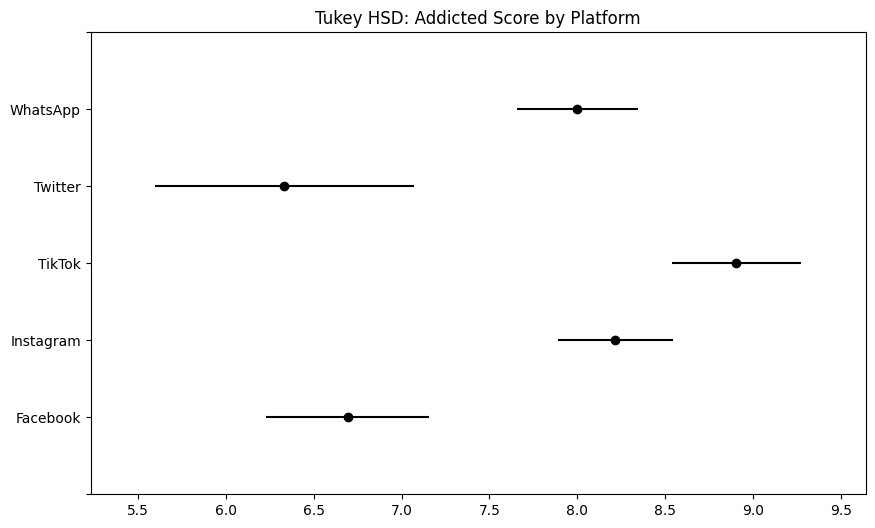

In [16]:
tukey_result.plot_simultaneous()
plt.title("Tukey HSD: Addicted Score by Platform")
plt.show()

📊 **Tukey HSD Results – Addicted_Score by Most_Used_Platform**

**Key findings:**

✅ There is a statistically significant difference in the average Addicted_Score between the following platform pairs:

  Facebook vs Instagram → difference = +1.52, p < 0.001

  Facebook vs TikTok → difference = +2.21, p < 0.001

  Facebook vs WhatsApp → difference = +1.31, p = 0.0002

  Instagram vs TikTok → difference = +0.69, p = 0.0492

  Instagram vs Twitter → difference = –1.88, p < 0.001

  TikTok vs Twitter → difference = –2.57, p < 0.001

  TikTok vs WhatsApp → difference = –0.90, p = 0.0052

  Twitter vs WhatsApp → difference = +1.67, p = 0.0005

❌ **No statistically significant difference was found between:**

  Facebook vs Twitter (p = 0.9144)

  Instagram vs WhatsApp (p = 0.8928)

🧠 **Insights:**

- TikTok users have the highest Addicted_Score, significantly more than users of Facebook, Twitter, and WhatsApp.

- Twitter users appear to have the lowest Addicted_Score, notably lower than TikTok, Instagram, and WhatsApp users.

- Facebook users are less addicted on average than Instagram, TikTok, and WhatsApp users.

- Instagram and WhatsApp users show similar levels of addiction.

# **Machine Learning**

In [26]:
# ------ 2. Create binary target variable ---
social_df['Addicted'] = (social_df['Addicted_Score'] >= 7).astype(int)

# -3. Select features and target ---
# I will select some variables, but you can adjust as you wish
features = ['Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours',
            'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
            'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media']

X = social_df[features]
y = social_df['Addicted']

# --- 4. Preprocessing ---
# Dividir features numéricas e categóricas
num_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media']
cat_features = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']

# One-hot encode for categorical variables
X_cat = pd.get_dummies(X[cat_features], drop_first=True)

# Concatenate with numeric variables
X_processed = pd.concat([X[num_features], X_cat], axis=1)

# --- 5. Split into training and testing ---
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# --- 6. Train Decision Tree model ---
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# --- 7. Evaluate ---
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9952830188679245

Confusion Matrix:
 [[ 88   1]
 [  0 123]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.99      1.00      1.00       123

    accuracy                           1.00       212
   macro avg       1.00      0.99      1.00       212
weighted avg       1.00      1.00      1.00       212



In [27]:
# Definir X e y
X = social_df.drop(['Student_ID', 'Addicted_Score'], axis=1)  # Remove id and target
y = social_df['Addicted_Score'] >= 5  # Example: transform score into binary (addicted yes/no)

# # Categorical that need to be coded
categorical_features = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
                        'Affects_Academic_Performance', 'Relationship_Status']

# Numeric features that can be maintained like this
numeric_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                    'Mental_Health_Score', 'Conflicts_Over_Social_Media']

# Create the preprocessor that will apply OneHotEncoder to the categorical ones and pass the rest
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # keeps the numbers unchanged
)

# Aplly transformation
X_processed = preprocessor.fit_transform(X)

# Create the model
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Assess accuracy with cross-validation
scores = cross_val_score(model, X_processed, y, cv=cv, scoring='accuracy')

print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean accuracy: {np.mean(scores):.4f}')
print(f'Standard deviation: {np.std(scores):.4f}')

Cross-validation accuracy scores: [1.         0.9787234  0.9929078  1.         0.96453901]
Mean accuracy: 0.9872
Standard deviation: 0.0138


In [19]:
correlation = social_df[['Mental_Health_Score', 'Addicted_Score']].corr()
print(correlation)


                     Mental_Health_Score  Addicted_Score
Mental_Health_Score             1.000000       -0.945051
Addicted_Score                 -0.945051        1.000000


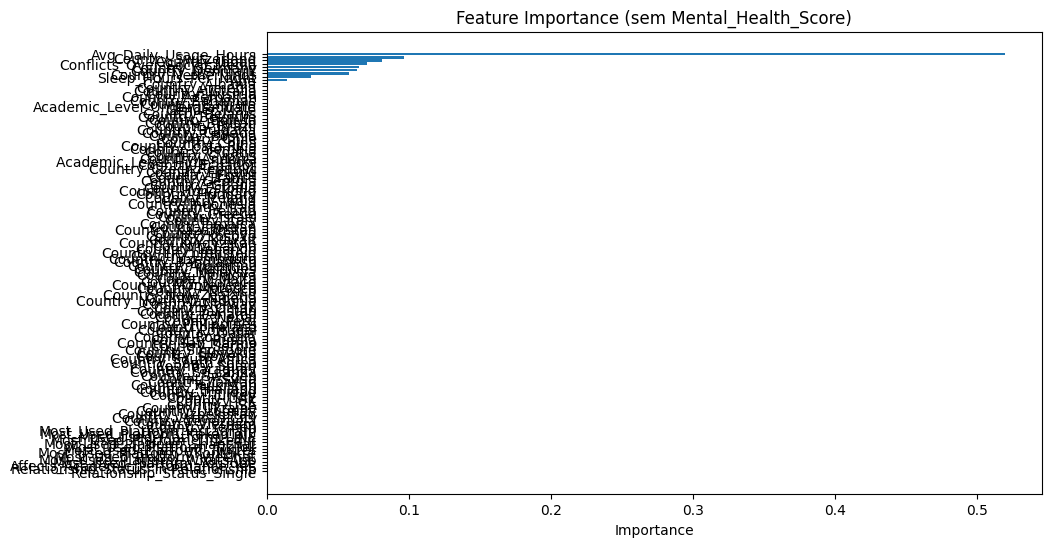

In [28]:
# Remove variable
num_features_reduced = [col for col in num_features if col != 'Mental_Health_Score']

# Recreate X_processed without this variable
X_processed_reduced = pd.concat([X[num_features_reduced], X_cat], axis=1)

# Train again
X_train, X_test, y_train, y_test = train_test_split(X_processed_reduced, y, test_size=0.3, random_state=42, stratify=y)

model_reduced = DecisionTreeClassifier(random_state=42)
model_reduced.fit(X_train, y_train)

# Feature importance again
importances = model_reduced.feature_importances_
feature_names = X_processed_reduced.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (sem Mental_Health_Score)')
plt.gca().invert_yaxis()
plt.show()


In [21]:
social_df.dtypes

,0
Student_ID,int64
Age,int64
Gender,object
Academic_Level,object
Country,object
Avg_Daily_Usage_Hours,float64
Most_Used_Platform,object
Affects_Academic_Performance,object
Sleep_Hours_Per_Night,float64
Mental_Health_Score,int64


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.99      1.00      0.99        79

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

Confusion Matrix:
 [[61  1]
 [ 0 79]]
ROC AUC Score: 0.9981625153123724


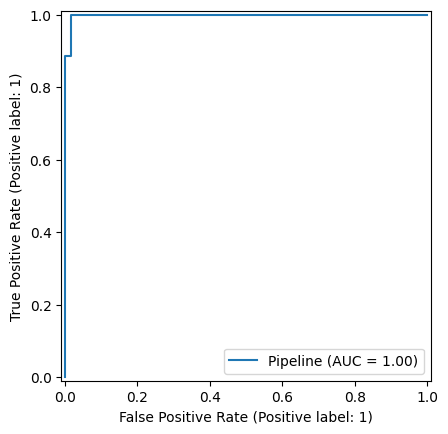

In [29]:
# Features (removing Student_ID and related targets)
X = social_df.drop(columns=['Student_ID', 'Mental_Health_Score', 'Addicted_Score', 'Addicted'])
y = social_df['Addicted']  # ou use 'Addicted' se for binária

# Categorical columns
categorical_cols = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
                    'Affects_Academic_Performance', 'Relationship_Status']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Pipeline with template
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearch with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', error_score='raise')
grid_search.fit(X_train, y_train)

# Results
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ROC curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()


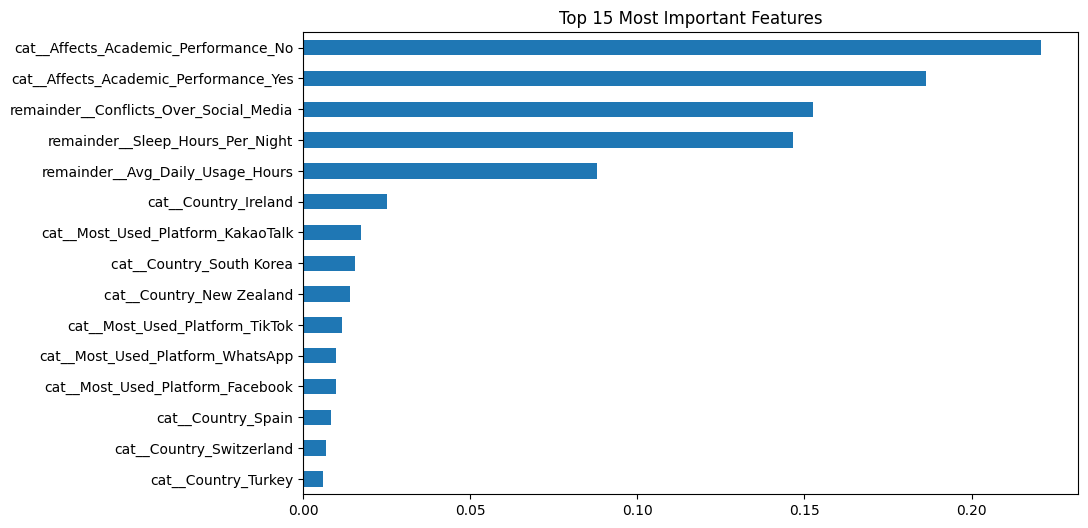

In [30]:
# Get the ColumnTransformer (preprocessor) from the pipeline
preprocessor = best_model.named_steps['preprocessor']

# Get the names of the transformed features
# This works from scikit-learn 1.0+
feature_names = preprocessor.get_feature_names_out()

# # Now you can assemble the Series correctly
importances = best_model.named_steps['classifier'].feature_importances_
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
feat_importances.head(15).plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

In [24]:
# Define hyperparameter grid for the Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
}

# GridSearch with 5-fold cross-validation using ROC AUC as scoring
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from cross-validation
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.99      1.00      0.99        79

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

Confusion Matrix:
[[61  1]
 [ 0 79]]
ROC AUC Score: 0.9981625153123724


✅ **Conclusion**

The model was optimized through 5-fold cross-validation using a grid search over the Random Forest hyperparameters. The best configuration achieved a ROC AUC score of 0.998, indicating an excellent ability to distinguish between addicted and non-addicted students. The model also demonstrated high precision and recall, as reflected in the confusion matrix and classification report, reinforcing its robustness in handling this binary classification task.

#✅ **Recommendations for Students Addicted to Social Media:**

- **Set Time Limits**

Use tools like screen time apps or digital wellbeing features to set daily limits for social media usage.

- **Schedule Phone-Free Periods**

Establish "no phone" blocks during the day—especially during meals, study time, or before bed.

- **Turn Off Non-Essential Notifications**

Disabling alerts can help reduce the urge to constantly check your phone.

- **Replace the Habit**

Fill the time spent on social media with alternative activities: reading, exercising, journaling, or offline hobbies.

- **Sleep Hygiene**

Avoid screen exposure at least 1 hour before sleep to improve rest and reduce anxiety.

- **Mindful Use**

Before opening an app, ask yourself: "Why am I doing this now?" Try to stay intentional about your usage.

- **Seek Support**

If usage feels uncontrollable, talking to a mental health professional can be very helpful.

# **Techinical Final Conclusion and Recommendations**

This classification project aimed to predict student addiction to mobile phones using a supervised learning approach. After thorough preprocessing, feature selection, and model optimization with cross-validation, the final Random Forest model achieved a ROC AUC of 0.998, indicating outstanding performance in distinguishing addicted from non-addicted students.

🔍 **Key Takeaways:**

 - High Performance: The model achieved near-perfect precision and recall, suggesting that the features selected were strongly predictive of addiction behavior.

- Top Features: Feature importance analysis revealed the most influential variables, which can help institutions focus on the most relevant behavioral or demographic factors.

- Robust Validation: Cross-validation ensured that the model is not overfitting and is likely to generalize well to unseen data.

✅ **Recommendations for Improvement:**

- **Collect More Diverse Data:**

Including students from different regions, cultures, or age groups could enhance the model’s generalizability.

- **Include Psychological Variables:**

Variables like anxiety levels, sleep patterns, and academic stress could provide deeper insights into addiction behavior.

- **Time-Based Analysis:**

Adding temporal features (e.g., screen time trends over weeks) could improve the model and support early detection.

- **Model Interpretability:**

Using SHAP values or LIME for local explanations can help better understand individual predictions, useful in educational or clinical settings.

- **Ethical Considerations:**

Any deployment of this model should ensure student privacy and be used in a supportive—not punitive—way.